In [3]:
include("/Users/meesvandartel/Desktop/Projects/LPR projects/FinGrowthABM_repo/GrowthBasic.jl")
using .GrowthBasic
using Agents
using Plots
using HypothesisTests
using ProgressMeter
using Statistics
using Base.Threads
using StatsBase

In [4]:
#ADF tests on aggregate and differences series respectively
MC = 1
dates = 1:500
agg_p = []
growth_p=[]
growth_vectors=[]

@showprogress for iter in 1:MC
    model = GrowthBasic.initialize_econ(;seed = rand(Int))
    GDP_series = []
    for t in dates
        GDP = 0
        for agent in allagents(model)
            Q = agent.Q
            GDP += Q
        end
        push!(GDP_series, log(GDP))
        step!(model)
    end
    GDP_series = convert(Vector{Float64}, GDP_series)
    GDP_growth = diff(GDP_series)
    push!(growth_vectors, GDP_growth)

    test_agg = ADFTest(GDP_series, :constant, :0)
    test_growth = ADFTest(GDP_growth,:constant,:0)
    push!(agg_p, pvalue(test_agg))
    push!(growth_p, pvalue(test_growth))
end


In [5]:
c_agg = count(x -> x>0.05, agg_p)
c_growth = count(x -> x>0.05, growth_p)

println("Share of accepted H0= unit root for aggregate: $((c_agg/MC)*100)%")

println("Share of accepted H0= unit root for differenced: $((c_growth/MC)*100)&")

#Aggregare is non-stationary, differences is stationary just as in paper

Share of accepted H0= unit root for aggregate: 100.0%
Share of accepted H0= unit root for differenced: 0.0&


In [6]:
MC = 100
dates = 500
growth_vectors=Vector{Vector{Float64}}(undef, MC)

@showprogress for iter in 1:MC
    model = GrowthBasic.initialize_econ(;seed = rand(Int))
    GDP_series = Vector{Float64}(undef, dates)
    for t in 1:dates
        GDP = 0.0
        @inbounds for agent in allagents(model)
            GDP += agent.Q
        end
        GDP_series[t] = log(GDP)
        step!(model)
    end
    GDP_growth = diff(GDP_series)
    growth_vectors[iter] = GDP_growth

end

print(growth_vectors)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:45


[[-0.08338160893905044, -0.0791373205587238, -0.07769074774350493, -0.0793581311845708, -0.02791672501291842, -0.11464375418217276, -0.1193317345187026, -0.13132749296782276, -0.20348966544783575, -0.6073892887780801, 0.33448487683215955, 1.8449331765372827, 0.6355635844656371, -0.11287986555762863, 0.3537920267258343, 0.3386625956966931, 0.40382061764717925, 0.3625551851302813, 0.20367382482052498, 0.6841737572554951, 0.28392832336125906, -0.04541422362853531, 0.8163581658366468, 0.08499259520136526, -0.02062353011244511, 0.053192049599324775, -0.47554344170838014, 0.13808705000827182, -0.6634931806399234, -0.03383398995380027, 0.7884474716281211, 1.064075147251181, -0.15484177657400622, 0.6579548070877976, 0.21731958030337495, -0.2132906117232487, -0.16971735128699983, -0.17538059430288477, 1.0253941718442867, 0.21312987079235413, 0.42557274133202405, 0.7951419290316792, 0.7498217106294298, 0.07097487558071514, 0.15887590618118885, 1.1808497132290228, 0.14453775366802546, 0.886524009

Excessive output truncated after 524288 bytes.

, -0.7707649444104163, -4.065329687782111, 3.993024741307636, -2.520980880569283, 0.10866792709116169, 0.4805055453308995, 0.5629638664443135, 1.3174942377026682, 0.08216463438889576, 0.7226733005501274, 0.27414021887323514, 0.09339533546333456, 0.23303521927385162, 0.04560469231846298, 0.717643239914409, 0.07381592718282803, 0.11953041126866992, 0.02135435790172835, 0.4392047765801905, -0.2899489740995662, 1.1739138735743353, 0.27088791953394065, 0.0900377275534936, -0.1486979452349928, 0.5565916326748592, -0.03208470375800232, -0.04104672588359648, -1.2281162751229289, 1.770641910792321, 2.908706523810679

In [7]:
test = mean(growth_vectors)
print(test)

[-0.10157124852758219, -0.09567593110350288, -0.09723695537742462, -0.10117435325745686, -0.06855028158014985, 0.019783706270667743, 0.0727416728780665, 0.056770140438351734, 0.12205805102837491, 0.12141282824246749, 0.2098843434552127, 0.35201684185072535, 0.2863900272081621, 0.24756104719885877, 0.25108893721575476, 0.305957827450702, 0.2803023905239349, 0.29436119361273194, 0.315344450649868, 0.3635752139244702, 0.3542702379446074, 0.3676615449177727, 0.23495530503274487, 0.3180242027228299, 0.4371587304335215, 0.1568875684584005, 0.3503655711599947, 0.28852111419554005, 0.42631893428214496, 0.3662538913703828, 0.28452702875723074, 0.34006123038444075, 0.1803763805736662, 0.32471089080414073, 0.347916092268464, 0.2203734173103863, 0.26083589870399904, 0.3109519253467119, 0.33857498915720385, 0.29223925078087065, 0.25502395975958836, 0.21916073053139776, 0.3588726279093672, 0.2785850670715034, 0.18949971956899808, 0.4260633777846617, 0.2132446968064304, 0.37435923284923417, 0.3768532

[-0.051746449822354434, 0.19674379524206154, 0.16835263699551106, 0.08065802479098447, 0.12251369232533034, 0.04715859319263934, 0.01829129794642243, 0.09323568782920541, 0.03848658340581641, 0.01242140816510931, 0.07127104709782724, -0.011144504440270599, -0.06222326259792364, 0.051035577843400334, 0.004855178065596195, 0.04329924705792766, -0.08568270107122537, 0.08147433674858129, -0.01898001402680496, 0.014451602999142077, -0.04328169080892137, 0.027566842619307946, -0.03744324782596847, 0.02483266832901269, -0.025095999764011726, 0.009663332330011787, 0.04140506014727152, -0.039132337717094054, 0.028209716974308956, 0.06319854501748846]

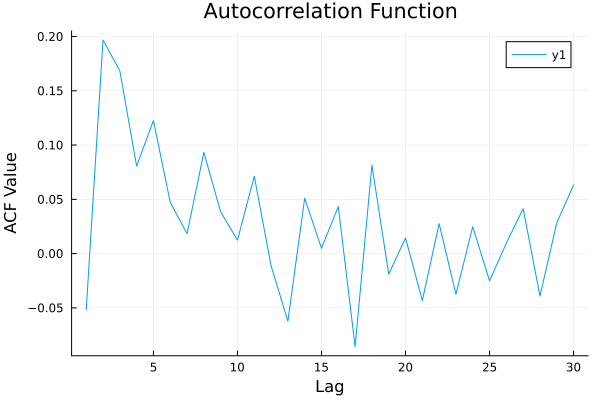

In [8]:
acf_values = autocor(test, collect(1:30); demean = true)
print(acf_values)

plot(acf_values, title="Autocorrelation Function", xlabel="Lag", ylabel="ACF Value")